In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat

from os.path import expanduser
home = expanduser("~")

In [3]:
model = 'GFDL-CM3'
experiment = 'historical'
org_option = 'rome' 

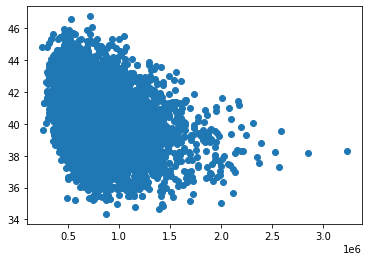

In [7]:
f, ax = plt.subplots()


org = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' +  model + '_rome_' + experiment + '.nc')[org_option]
wap500_ascent = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_wap500_ascent_historical.nc')['wap500_ascent']
x = org
y = wap500_ascent 

plt.scatter(x,y)




Text(0, 0.5, 'fraction of wap500<0 (%)')

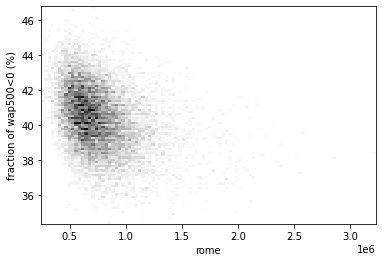

In [26]:
f, ax = plt.subplots()
plt.hist2d(x,y,[100,100], cmap ='gist_gray_r') # 'gist_yarg'
plt.xlabel('rome')
plt.ylabel('fraction of wap500<0 (%)')